NAME: DEV AGARWAL REG NO: 220968019 SECTION: A ROLL NO: 06 BATCH: 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


UNDERSTANDING THE DATA

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


DROPPING NAN VALUES AND DUPLICATE VALUES

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df = df.drop_duplicates()

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

MULTIPLE LINEAR REGRESSION

In [8]:
x = df.drop(columns = 'Outcome')
y = df[['Outcome']]

In [9]:
scaler = MinMaxScaler()
model=scaler.fit(x)
scaled_data=model.transform(x)
 
# print scaled features
print(scaled_data)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [12]:
reg = LinearRegression()

In [13]:
reg.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = reg.predict(x_test)

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

ERROR CALCULATION

In [41]:
mse = mean_squared_error(y_test,y_pred)
print("mean squared error: ",mse)
rmse  = math.sqrt(mse)
print("root mean square error: ",rmse)
mae = mean_absolute_error(y_test,y_pred)
print("mean absolute error: ",mae)

mean squared error:  0.15473658619758926
root mean square error:  0.3933657155848604
mean absolute error:  0.32902373479170804


In [19]:
y_pred

[array([1.00652309]),
 array([0.21014657]),
 array([0.08960339]),
 array([0.61051716]),
 array([0.16018883]),
 array([-0.05585901]),
 array([0.66506586]),
 array([0.79701108]),
 array([0.39524288]),
 array([0.41318193]),
 array([0.54136512]),
 array([1.03008655]),
 array([0.3552512]),
 array([0.20243953]),
 array([0.15535587]),
 array([0.21249144]),
 array([0.80874076]),
 array([-0.11874611]),
 array([0.47673644]),
 array([0.30016833]),
 array([0.60521404]),
 array([0.40637889]),
 array([0.2632162]),
 array([0.04720757]),
 array([-0.00330766]),
 array([0.38441952]),
 array([-0.01561558]),
 array([0.86371668]),
 array([0.14655874]),
 array([0.18944348]),
 array([0.48625288]),
 array([0.29251766]),
 array([0.10623267]),
 array([0.45417435]),
 array([0.13031735]),
 array([0.65677613]),
 array([0.47717326]),
 array([0.09476549]),
 array([0.37572647]),
 array([0.67528545]),
 array([0.32046771]),
 array([0.24289669]),
 array([0.21087443]),
 array([0.76313335]),
 array([0.71629682]),
 array([

LINEAR REGRESSION

In [20]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

OUTCOME IS CORREALTED THE MOST TO THE GLUCOSE COLUMN

In [21]:
df1 = df[['Glucose','Outcome']]

In [22]:
X,Y = train_test_split(df1, test_size = 0.3, random_state = 0)

In [23]:
X_train = X[['Glucose']]
Y_train = X[['Outcome']]
X_test = Y[['Glucose']]
Y_test = Y[['Outcome']]

In [24]:
regressor = LinearRegression()

In [25]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [26]:
Y_pred = regressor.predict(X_test)

In [29]:
Y['predicted_outcome'] = Y_pred

ERROR CALCULATION

In [40]:
MSE = mean_squared_error(Y_test,Y_pred)
print("mean squared error: ",MSE)
RMSE  = math.sqrt(MSE)
print("root mean square error: ",RMSE)
MAE = mean_absolute_error(Y_test,Y_pred)
print("mean absolute error: ",MAE)

mean squared error:  0.1734181207722777
root mean square error:  0.41643501386444165
mean absolute error:  0.35886561583284926


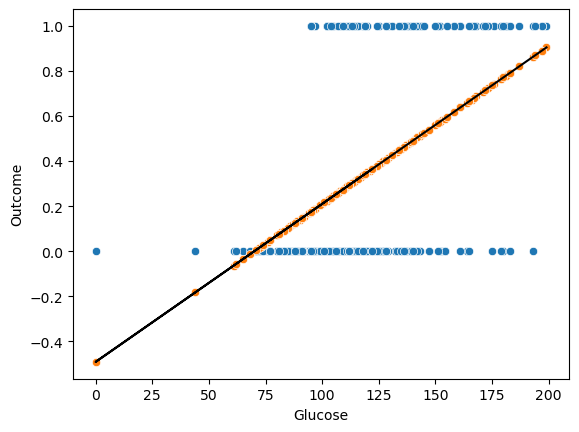

In [42]:
sns.scatterplot(x = 'Glucose',y = 'Outcome', data = Y)
sns.scatterplot(x = 'Glucose',y = 'predicted_outcome', data = Y)
plt.plot(Y['Glucose'], Y['predicted_outcome'], color = 'black')
plt.show()